# *Imports*

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# *Dataframe*

In [42]:
df = pd.read_csv('..\datasets\mnist.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_13160\503686527.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\mnist.csv')


In [43]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.label.nunique()

10

In [45]:
df.label.value_counts()

label
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

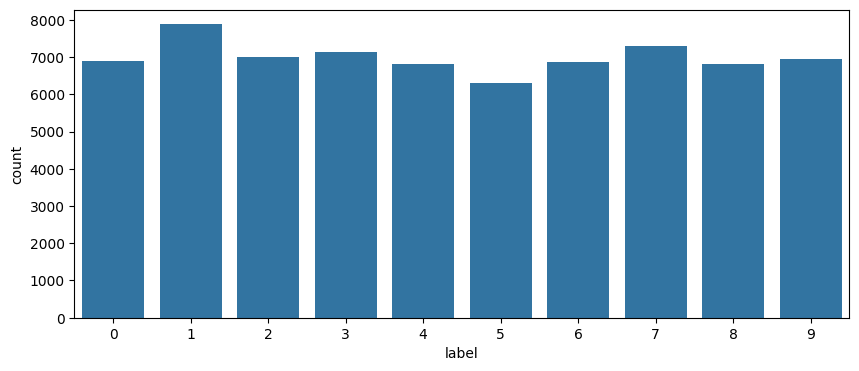

In [46]:
plt.figure(figsize=(10,4))
g = sns.countplot(x=df['label'])

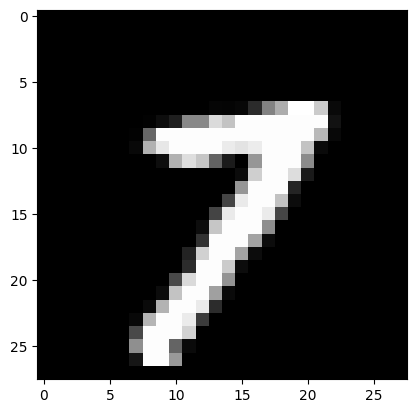

In [47]:
digit = df.iloc[40000, 1:].values.reshape(28,28)
plt.imshow(digit, cmap='gray')

In [48]:
df.iloc[40000,0]

7

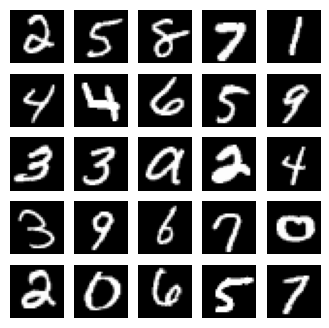

In [49]:
indexes = np.random.randint(0, df.shape[0], size = 25)

plt.figure(figsize = (4,4))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = df.iloc[indexes[i], 1:].values.reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

#for i in range(5):
#    for c in range (5):
#        print(df.iloc[indexes])

# Pré-processamento

In [50]:
X = df.drop('label', axis=1)
y = df.label

In [51]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: label, Length: 70000, dtype: int64

In [53]:
y = y.to_numpy()

In [54]:
y, type(y)

(array([5, 0, 4, ..., 4, 5, 6], dtype=int64), numpy.ndarray)

In [55]:
X = X.values.reshape(-1, 28, 28, 1)

In [56]:
X

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [57]:
X.shape, y.shape

((70000, 28, 28, 1), (70000,))

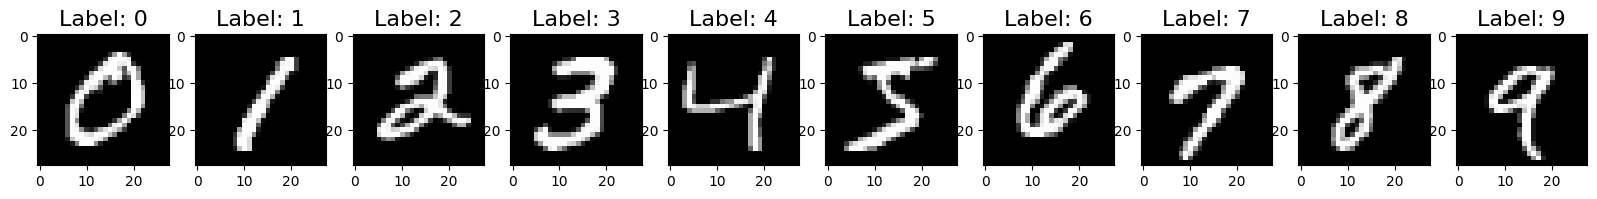

In [58]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample= X[y==i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
for i in range(10):
    print(y[i])

5
0
4
1
9
2
1
3
1
4


In [61]:
y_onehot = to_categorical(y, num_classes=10)
y_onehot.shape

(70000, 10)

In [62]:
for i in range(10):
    print(y_onehot[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size = 0.15, random_state= 50)

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

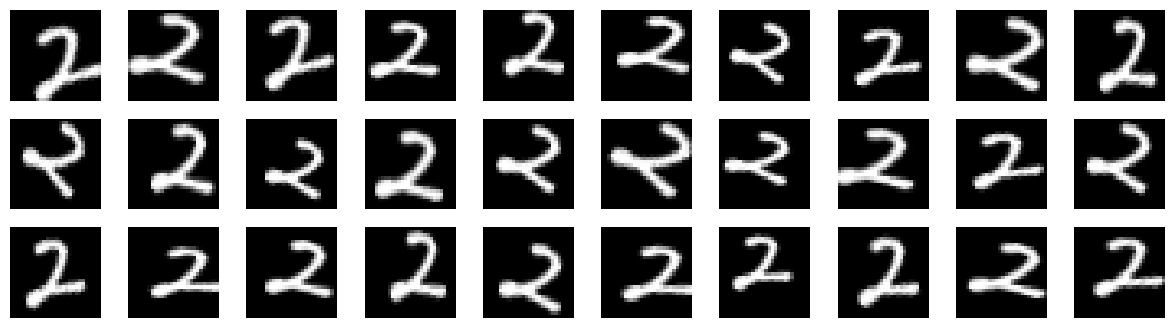

In [65]:
image_to_augment = X_train[0]
image_to_augment = np.expand_dims(image_to_augment, axis = 0)

example_datagen = ImageDataGenerator(featurewise_center = False,
                                    rotation_range = 30,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.2,
                                    horizontal_flip = False,
                                    vertical_flip = False)
augmented_images_iterator = example_datagen.flow(image_to_augment, batch_size = 1)

fig, ax = plt.subplots(3, 10, figsize = (15,4))
ax = ax.flatten()
for i, ax in enumerate(ax):
    augmented_image = next(augmented_images_iterator)[0]
    ax.imshow(augmented_image, cmap = 'gray')
    ax.axis('off')

In [66]:
input_shape = (28,28,1)

In [67]:
model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                padding='Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

batch_size = 32
epochs = 3 #30

In [68]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [69]:
datagen = ImageDataGenerator(featurewise_center = False,
                             samplewise_center = False,
                                    featurewise_std_normalization = False,
                                    samplewise_std_normalization = False,
                                    zca_whitening = False,
                                    rotation_range = 5,
                                    zoom_range = 0.1,
                                    width_shift_range = 0.1,
                                    horizontal_flip = False,
                                    vertical_flip = False)

In [70]:
datagen.fit(X_train)

In [71]:
class_cnn = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs,
                                   steps_per_epoch = X_train.shape[0]//batch_size,
                                   validation_data = (X_test, y_test))

Epoch 1/3
   1/1859 ━━━━━━━━━━━━━━━━━━━━ 2:04:47 4s/step - accuracy: 0.0938 - loss: 60.4243

c:\Users\benso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1859/1859 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.6123 - loss: 2.4165 - val_accuracy: 0.9762 - val_loss: 0.0782
Epoch 2/3
   1/1859 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9375 - loss: 0.1641

c:\Users\benso\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1859/1859 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9375 - loss: 0.1641 - val_accuracy: 0.9761 - val_loss: 0.0787
Epoch 3/3
1859/1859 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9366 - loss: 0.2069 - val_accuracy: 0.9819 - val_loss: 0.0605


In [72]:
predictions = model.predict(X_test)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [73]:
predictions

array([[9.1618609e-16, 8.6070311e-13, 4.5499964e-09, ..., 4.8999571e-10,
        5.9890398e-10, 3.2842054e-12],
       [7.9818048e-13, 8.5225993e-11, 6.0969456e-09, ..., 5.2773397e-10,
        9.0208779e-10, 5.9272884e-09],
       [2.3285315e-12, 2.8624728e-11, 5.9740110e-08, ..., 1.8039777e-09,
        3.4102047e-08, 5.3558113e-09],
       ...,
       [1.0865837e-11, 3.1455513e-10, 7.9457969e-08, ..., 9.9999988e-01,
        6.4601931e-12, 2.6617670e-08],
       [3.7747626e-13, 5.3896737e-10, 1.4038200e-11, ..., 2.4895472e-09,
        8.6712526e-11, 2.4409923e-07],
       [3.7212914e-13, 1.0000000e+00, 1.9643698e-10, ..., 4.2514539e-09,
        3.1145134e-10, 3.2884959e-10]], dtype=float32)

In [74]:
y_pred = np.argmax(predictions, axis = 1)
y_pred

array([3, 3, 3, ..., 7, 4, 1], dtype=int64)

In [75]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [76]:
y_true = np.argmax(y_test, axis=1)

In [77]:
from sklearn.metrics import accuracy_score
print(f'Accuracy is {accuracy_score(y_true, y_pred)}')

Accuracy is 0.981904761904762


In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

  1/329 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9375 - loss: 0.1363

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0665
Test loss: 0.060481224209070206, Test accuracy: 0.9819047451019287


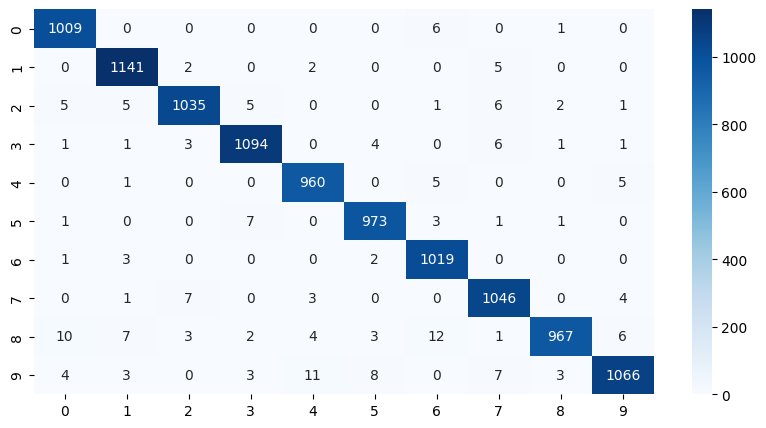

In [79]:
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

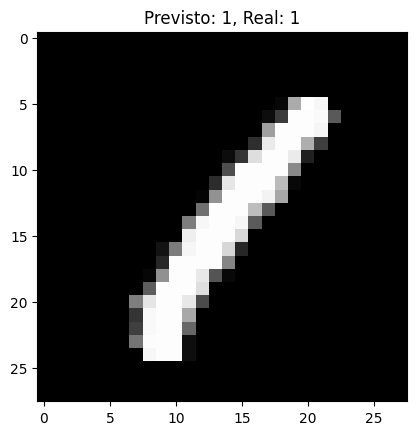

In [80]:
random_nr = np.random.choice(len(X_test))

x_sample = X_test[random_nr]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_nr]
y_sample_pred = y_pred[random_nr]

plt.title(f'Previsto: {y_sample_pred}, Real: {y_sample_true}')
plt.imshow(x_sample.reshape(28,28), cmap='gray')